In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
tweets = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names = ['label','id','date','noquery','handler','tweet'])

In [3]:
tweets.head()

,label,id,date,noquery,handler,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
label      1600000 non-null int64
id         1600000 non-null int64
date       1600000 non-null object
noquery    1600000 non-null object
handler    1600000 non-null object
tweet      1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
tweets.drop(['id', 'date','noquery','handler'], axis=1, inplace=True)

In [6]:
tweets.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
tweets.groupby('label').describe()

tweet                                        
        count  unique                        top freq
label                                                
0      800000  790185  isPlayer Has Died! Sorry   210
4      800000  793506              good morning   118

In [8]:
tweets['length'] = tweets['tweet'].apply(len)
tweets.head()

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [37]:
tweets['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [39]:

tweets['label'] = tweets['label'].map({0: 0, 4: 1})

In [40]:
tweets.length.describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: length, dtype: float64

In [41]:
tweets[tweets['length'] == 359]['tweet']

380539     @neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à¸£...
1582941    5 days till new top gear  î?î?î?î?î?î?î?...
Name: tweet, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F23E8EE898>,
      dtype=object)

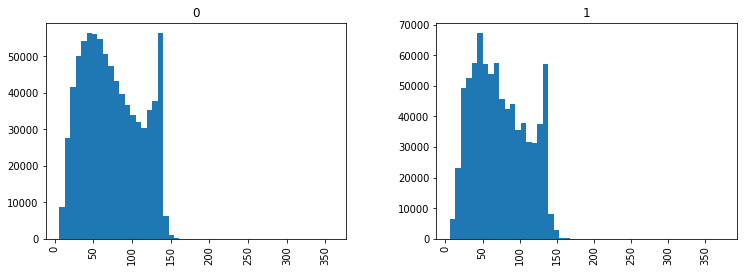

In [42]:
tweets.hist(column='length', by='label', bins=50,figsize=(12,4))

### Now we will sample the data points to have 100K points and will further divide to testing and training with 70% of the data in training and 30% of data in testing set

In [43]:
tweets_sample100K = tweets.sample(n=100000, random_state=101 )

In [44]:
tweets_sample100K.head()

,label,tweet,length
250977,0,@Kardboard yea ugh. I don't wanna move either...,113
150064,0,"Guess there's a first time for everything, my ...",105
710275,0,My cousin is going to America and it's NOT FAI...,130
367641,0,@mitchelmusso Ahh this is my first comment to ...,138
575674,0,taking care of my good friend jessica she is s...,110


In [45]:
from nltk.stem import WordNetLemmatizer

In [46]:
#
#  Input : dataframe with a column names 'text' which contains raw tweets (one per row)
#  Output: A list of lists of tokens corrsponding to the 'text' column
#
def tokenize_tweets2(tweets):
    """Given a df with tweets in 'text' col, this function return tokens as a list of lists"""

    # apply tokenize to the 'text' coolumn in the tweets df
    tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
    tokens = tweets['tweet'].apply(tweet_tokenizer.tokenize)
    
    # filter
    misc = ['rt', '’', '…', '—', 'u', '”', 'w', '“', '...', '️', 'http', 'https','..']
    to_remove = nltk.corpus.stopwords.words('English') + list(string.punctuation) + misc
    
    lemmatizer = WordNetLemmatizer()
    
    tokens = [[lemmatizer.lemmatize(token, pos='v') for token in tw if token not in to_remove] for tw in tokens]      
    return(tokens)

In [47]:
all_tokens = tokenize_tweets2(tweets_sample100K)
print(len(all_tokens))
all_tokens[:10]

100000


[['yea',
  'ugh',
  'wanna',
  'move',
  'either',
  'textbooks',
  'note',
  'table',
  'sigh'],
 ['guess',
  "there's",
  'first',
  'time',
  'everything',
  'cars',
  'break',
  'm1',
  "i've",
  'get',
  'rac',
  'way'],
 ['cousin',
  'go',
  'america',
  'fair',
  'know',
  'wayyy',
  'pppl',
  'ugh',
  'wanna',
  'meeet',
  'twitter',
  'friends'],
 ['ahh',
  'first',
  'comment',
  'youu',
  'love',
  'xxxand',
  'please',
  'reply',
  'even',
  'though',
  'know',
  'never',
  'keep',
  'hope',
  'x'],
 ['take',
  'care',
  'good',
  'friend',
  'jessica',
  'sick',
  'go',
  'crazy',
  'allow',
  'leave',
  'room',
  'today'],
 ['#andyclemmensen', '#bradiewebb', '#shaundiviney', '#shortstack'],
 ['time', 'think', 'go', 'take', 'hubby'],
 ['boo', 'hoo', 'hoo', 'sad'],
 ['andrea',
  'martin',
  'hearts',
  'addict',
  'download',
  'link',
  'http://limelinx.com/files/af37bb8762d8c9e3b8277527ecad3e4e',
  '2nd',
  'fave'],
 ['watch',
  'american',
  'idol',
  'ben',
  'stiller',

In [26]:
tweets_sample100K['all_tokens']=all_tokens

In [27]:
tweets_sample100K.head()

,label,tweet,length,all_tokens
250977,0,@Kardboard yea ugh. I don't wanna move either...,113,"[yea, ugh, wanna, move, either, textbooks, not..."
150064,0,"Guess there's a first time for everything, my ...",105,"[guess, there's, first, time, everything, cars..."
710275,0,My cousin is going to America and it's NOT FAI...,130,"[cousin, go, america, fair, know, wayyy, pppl,..."
367641,0,@mitchelmusso Ahh this is my first comment to ...,138,"[ahh, first, comment, youu, love, xxxand, plea..."
575674,0,taking care of my good friend jessica she is s...,110,"[take, care, good, friend, jessica, sick, go, ..."


In [28]:
tweets_sample100K['length'].describe()

count    100000.000000
mean         74.071280
std          36.434795
min           7.000000
25%          44.000000
50%          69.000000
75%         103.000000
max         359.000000
Name: length, dtype: float64

In [30]:
tweets_sample100K[tweets_sample100K['length']==359]

,label,tweet,length,all_tokens
380539,0,@neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à¸£...,359,"[à¹, , à, ¸, £, à, ¸, ·, à¹, , à, ¸, ­, à, ¸..."


{'bodies': [<matplotlib.collections.PolyCollection at 0x1f23e972160>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f23e972b00>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f23e971668>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f23e971eb8>}

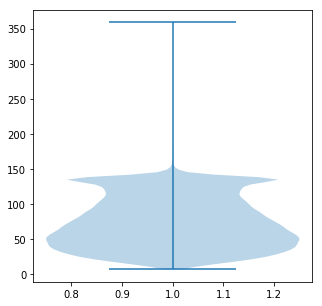

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.violinplot(tweets_sample100K['length'])
#plt.show()

In [32]:
tweets_sample100K[tweets_sample100K['length']>140]

,label,tweet,length,all_tokens
1191744,4,I still think new &quot;Uncover and Discover&q...,145,"[still, think, new, uncover, discover, motto, ..."
950909,4,It begins again VERY excited. Really hope it'...,142,"[begin, excite, really, hope, legit, know, jum..."
931811,4,@gwegner this is really nice &quot;using whol...,141,"[really, nice, use, whole, body, creativity, d..."
1125083,4,@derdan might be interested to know they eat z...,148,"[might, interest, know, eat, zombies, forget, ..."
690294,0,Both G &amp; I luv &quot;The Proposal.&quot; B...,148,"[g, luv, proposal, bullock, awesome, serious, ..."
803323,4,I am going to have to stop using &quot;Comcast...,145,"[go, stop, use, comcastic, mean, bad, things, ..."
287372,0,says Can't find anyone to watch &quot;Up&quot;...,146,"[say, can't, find, anyone, watch, go, drag, mo..."
451713,0,"@tommcfly ok, if you say &quot;sorry&quot; aga...",141,"[ok, say, sorry, go, chile, kick, ass, celebra..."
821921,4,just had the most delicious liver &amp; bacon ...,146,"[delicious, liver, bacon, fantastic, bio, aspa..."
952619,4,"Exactly. Done deal, pro forma. Not like it mat...",148,"[exactly, do, deal, pro, forma, like, matter, ..."


In [61]:
# from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# bow_transformer = CountVectorizer(analyzer = tokenize_tweets2).fit(tweets['tweet'])

In [51]:
# from collections import Counter

# counts = Counter([token for tokens in all_tokens for token in tokens])
# print(len(counts))
# counts.most_common(20)

In [52]:
# top_words = [k for k in counts.keys() if counts.get(k) > 50]
# len(top_words)

In [12]:
# trainingSet_10percent = trainingSet.sample(frac = 0.01)